In [1]:
%matplotlib inline

import os
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
from scipy import stats

import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
from modules.kidera import score_positions, score_sequence

In [2]:
df = pd.read_csv("output/HLA-A02:01_NMP_9mer_proc.txt", sep=' ')
df = df[df['Aff(nM)'] <= 500]
df.index = range(len(df))
df.head()

,HLA,Peptide,Aff(nM)
0,HLA-A*02:01,AAAGLTVTV,430.7
1,HLA-A*02:01,AAAGLVPLV,157.6
2,HLA-A*02:01,AAAGNPFPV,125.8
3,HLA-A*02:01,AAAGPLPPI,481.7
4,HLA-A*02:01,AAAGTFLAV,197.3


In [3]:
tqdm.pandas(desc="progress")

In [4]:
df1 = pd.concat([df, df.Peptide.progress_apply(lambda s: score_sequence(s))], axis=1)
df1.head()

progress: 100%|██████████| 337107/337107 [09:21<00:00, 600.76it/s]


,HLA,Peptide,Aff(nM),1,2,3,4,5,6,7,8,9,10
0,HLA-A*02:01,AAAGLTVTV,430.7,-0.580000,-1.087778,0.346667,-0.178889,-0.271111,-0.633333,0.002222,-0.091111,-0.291111,0.181111
1,HLA-A*02:01,AAAGLVPLV,157.6,-0.524444,-0.968889,-0.076667,-0.524444,-0.212222,-0.957778,0.088889,-0.175556,-0.034444,0.211111
2,HLA-A*02:01,AAAGNPFPV,125.8,0.121111,-0.825556,-0.431111,-0.387778,-0.003333,-0.511111,0.092222,-0.010000,0.311111,-0.340000
3,HLA-A*02:01,AAAGPLPPI,481.7,0.132222,-0.902222,-0.560000,-0.565556,-0.126667,-0.646667,0.194444,-0.558889,0.255556,-0.296667
4,HLA-A*02:01,AAAGTFLAV,197.3,-0.723333,-1.007778,-0.162222,-0.393333,-0.394444,-0.743333,0.146667,0.143333,0.035556,-0.014444


In [5]:
df1.columns = ['HLA', 'Peptide', 'Affinity', "helix.bend.pref", "side.chain.size",\
               "extended.str.pref", "hydrophobicity", "double.bend.pref", "partial.spec.vol",\
               "flat.ext.pref", "occurrence.alpha.reg", "pK.C", "surrounding.hydrop"]

In [6]:
df2 = df1.drop(['HLA', 'Affinity'], axis=1)
df2.head()

,Peptide,helix.bend.pref,side.chain.size,extended.str.pref,hydrophobicity,double.bend.pref,partial.spec.vol,flat.ext.pref,occurrence.alpha.reg,pK.C,surrounding.hydrop
0,AAAGLTVTV,-0.580000,-1.087778,0.346667,-0.178889,-0.271111,-0.633333,0.002222,-0.091111,-0.291111,0.181111
1,AAAGLVPLV,-0.524444,-0.968889,-0.076667,-0.524444,-0.212222,-0.957778,0.088889,-0.175556,-0.034444,0.211111
2,AAAGNPFPV,0.121111,-0.825556,-0.431111,-0.387778,-0.003333,-0.511111,0.092222,-0.010000,0.311111,-0.340000
3,AAAGPLPPI,0.132222,-0.902222,-0.560000,-0.565556,-0.126667,-0.646667,0.194444,-0.558889,0.255556,-0.296667
4,AAAGTFLAV,-0.723333,-1.007778,-0.162222,-0.393333,-0.394444,-0.743333,0.146667,0.143333,0.035556,-0.014444


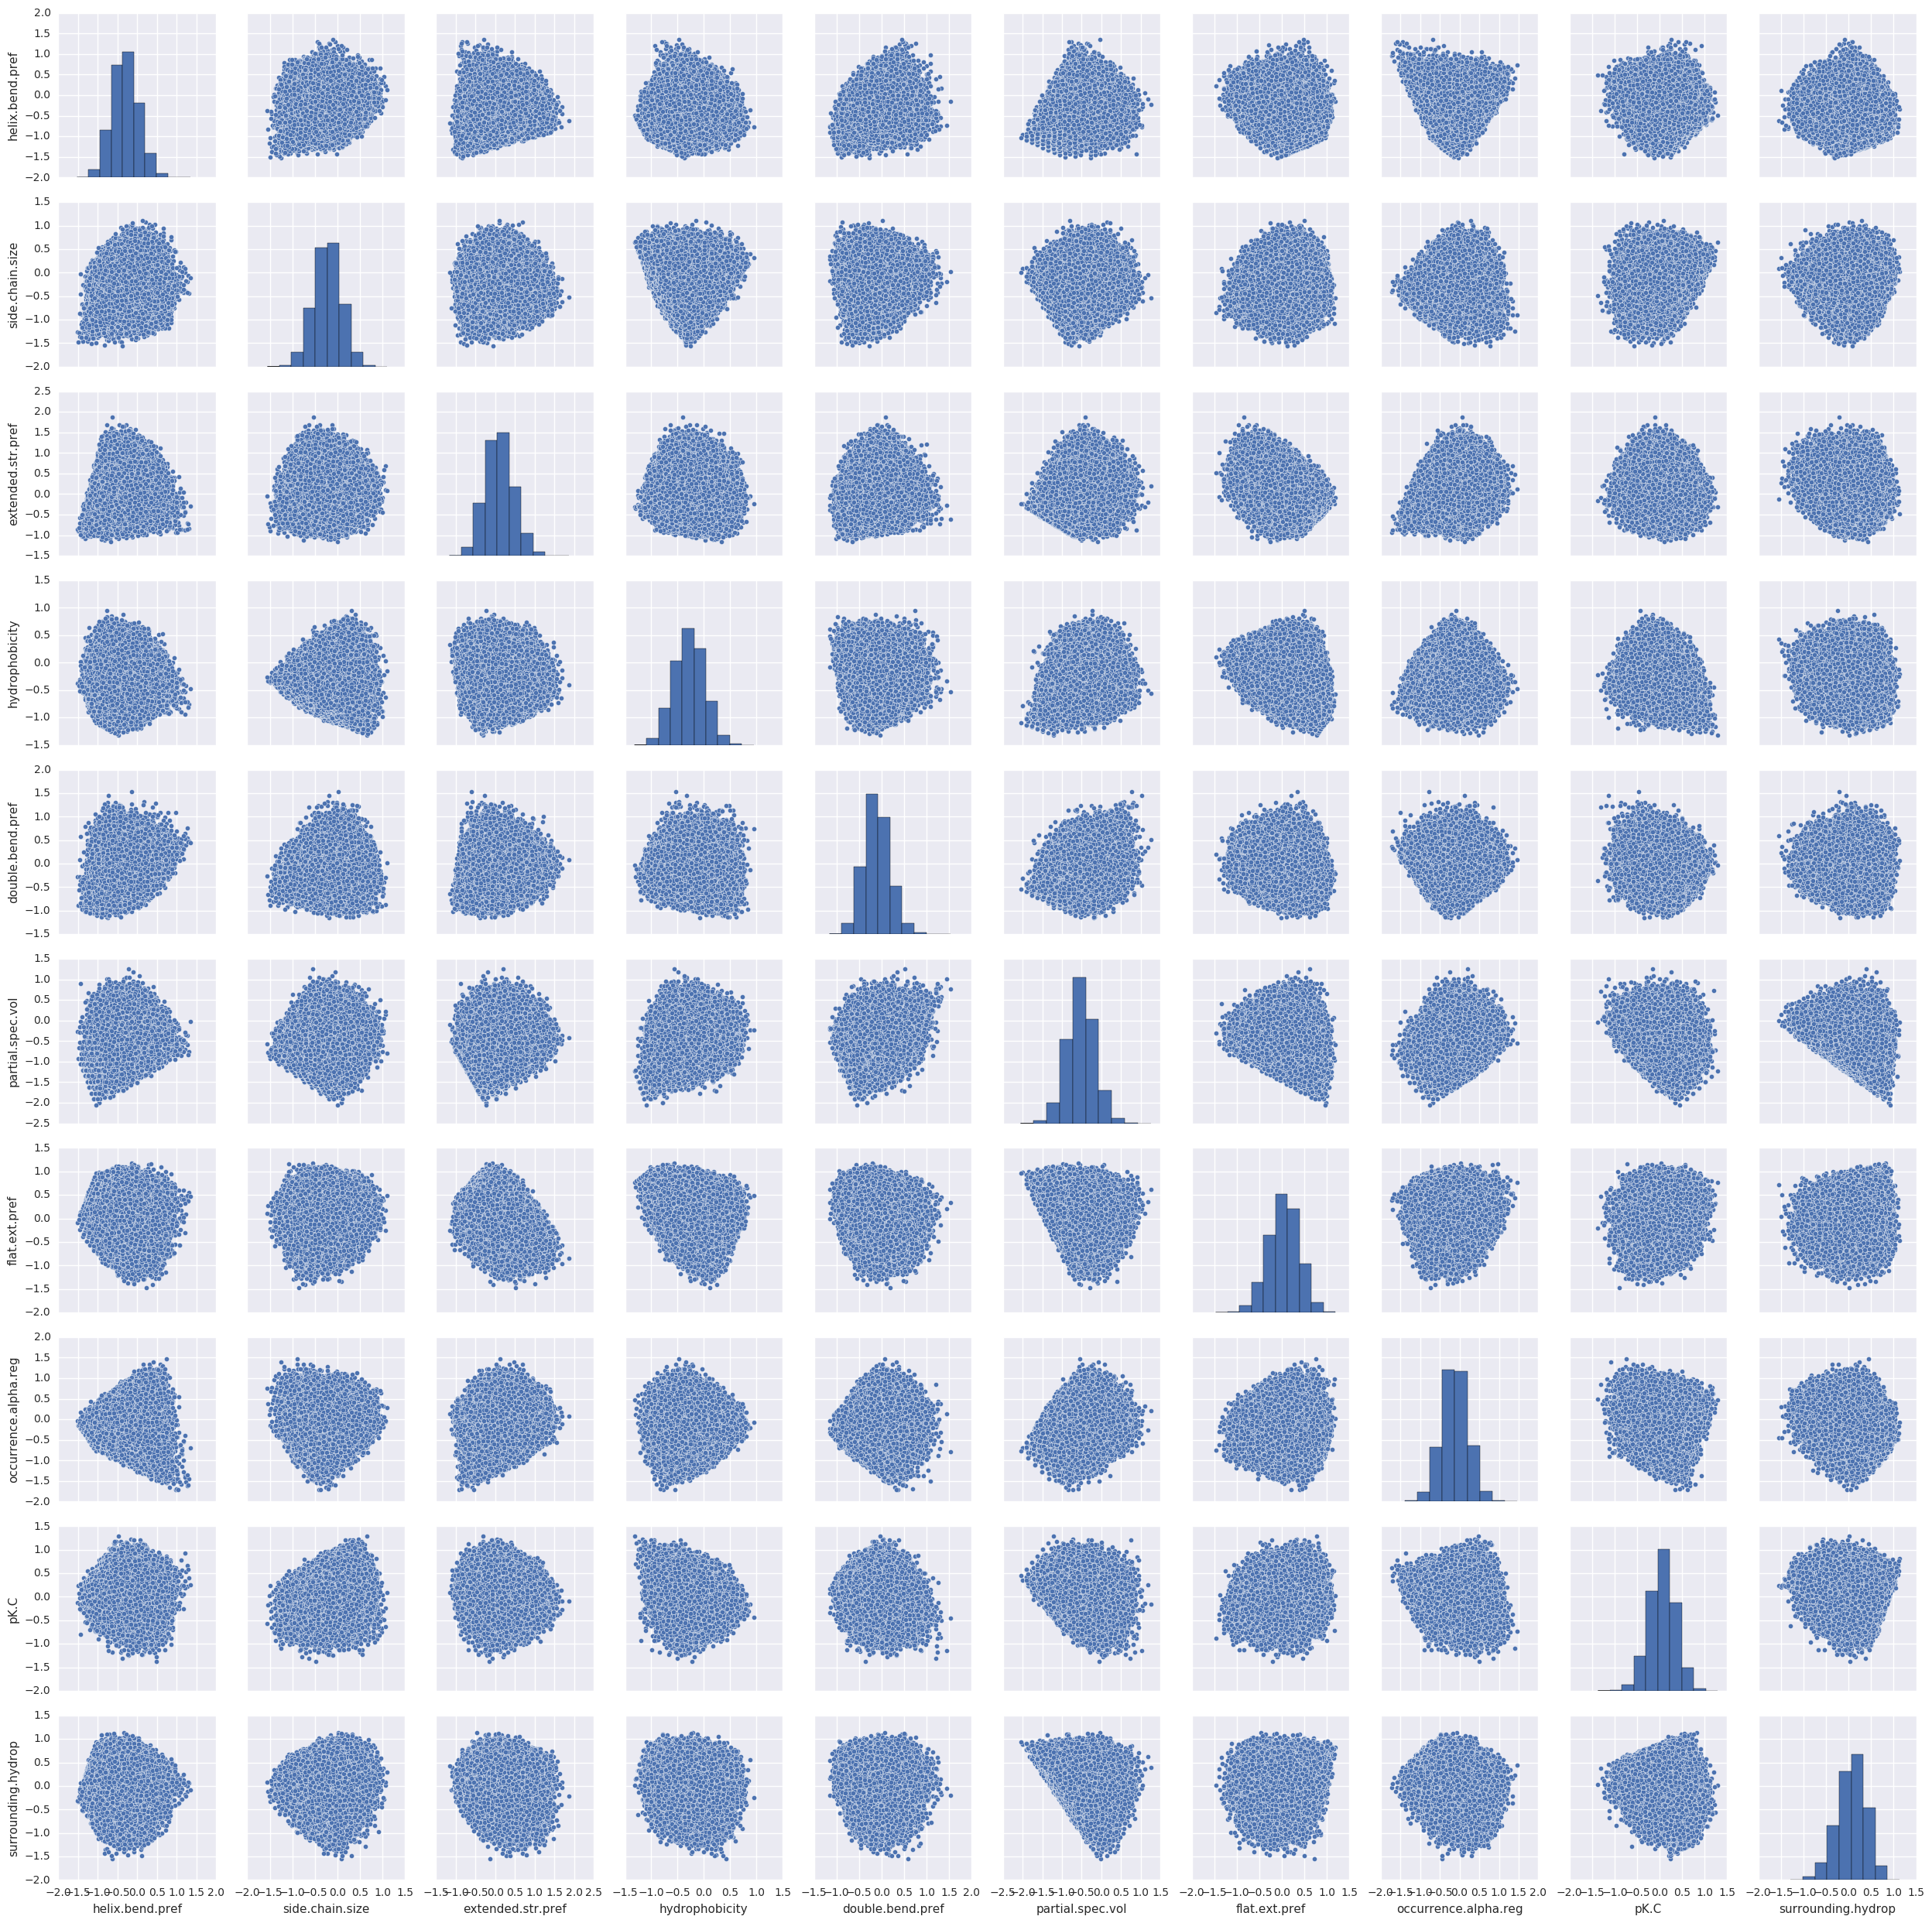

In [24]:
sns.pairplot(df2.drop('Peptide', axis=1))

In [7]:
df2.describe()

,helix.bend.pref,side.chain.size,extended.str.pref,hydrophobicity,double.bend.pref,partial.spec.vol,flat.ext.pref,occurrence.alpha.reg,pK.C,surrounding.hydrop
count,337107.000000,337107.000000,337107.000000,337107.000000,337107.000000,337107.000000,337107.000000,337107.000000,337107.000000,337107.000000
mean,-0.301591,-0.220785,0.105764,-0.277245,-0.105849,-0.522631,0.040072,-0.117424,0.059770,0.068345
std,0.333433,0.306223,0.355121,0.288716,0.283771,0.349539,0.333627,0.333714,0.289084,0.319961
min,-1.524444,-1.553333,-1.163333,-1.320000,-1.152222,-2.050000,-1.468889,-1.711111,-1.370000,-1.552222
25%,-0.534444,-0.426667,-0.143333,-0.478889,-0.302222,-0.754444,-0.183333,-0.340000,-0.131111,-0.138889
50%,-0.310000,-0.217778,0.094444,-0.274444,-0.118889,-0.525556,0.048889,-0.118889,0.066667,0.087778
75%,-0.078889,-0.013333,0.341111,-0.076667,0.077778,-0.292222,0.273333,0.105556,0.257778,0.295556
max,1.345556,1.103333,1.864444,0.945556,1.526667,1.248889,1.185556,1.470000,1.290000,1.131111


In [8]:
df2.mean()

helix.bend.pref        -0.301591
side.chain.size        -0.220785
extended.str.pref       0.105764
hydrophobicity         -0.277245
double.bend.pref       -0.105849
partial.spec.vol       -0.522631
flat.ext.pref           0.040072
occurrence.alpha.reg   -0.117424
pK.C                    0.059770
surrounding.hydrop      0.068345
dtype: float64

Next I am going to plot mean values of aa properties for all alleles' binders

In [ ]:
file_list = []
for name in os.listdir("output/"):
    if "NMP" in name:
        file_list.append(name)
for i, s in enumerate(file_list):
    file_list[i] = s.replace("_NMP_9mer_proc.txt", "")